<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-ccpl/blob/main/V12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hier: CLV in mehr Klassen aufgeteilt (4 Klassen) - um churn zu identifizieren

und

jeweils den letzten Dummy gelöscht

# **Relevanz des Projekts**
Der Wettbewerbsdruck um Kunden steigt – sowohl in Produkt- als auch Dienstleistungsmärkten – seit Jahren, insbesondere getrieben durch die digitale Transformation der Wirtschaft. Dies führt dazu, dass eine individuelle Kundenansprache immer mehr an Bedeutung gewinnt, um die Kunden an das Unternehmen / die Marke zu binden und dadurch das Risiko der Kundenabwanderung zu minimieren (vgl. Gouthier, Kern (2021), S.129).
Der Wettbewerbsdruck um Kunden ist jedoch nicht für alle Kunden gleich. Je höher der erwartete Customer Lifetime Value eines Kunden ist, desto intensiver ist der Wettbewerb um einen solchen Kunden (vgl. Barak et al. (2020), S.52).
Der Customer Lifetime Value erfasst, wie wertvoll ein Kunde für ein Unternehmen ist und bietet somit einen Ansatz zur individuellen Kundenansprache. Denn je größer der Customer Lifetime Value eines Kunden ist, desto rentabler sind Kundenbindungsmaßnahmen, je niedriger der Customer Lifetime Value eines Kunden ist, desto notwendiger sind Maßnahmen zur Minimierung des Abwanderungsrisikos des Kunden (vgl. Engelen, Schneider (2021), S.13).

# **Vorgehen**

**Schritt 1: Data Preprocessing**

Um mit den vorliegenden Daten zielführende Analysen durchführen und Modelle entwickeln zu können, muss im ersten Schritt zunächst eine Aufbereitung der Daten erfolgen.

**Schritt 2: Classification**

Zunächst gilt es, die Ist-Situation des Kundenstamms zu erfassen. Hierzu entwickeln wir ein Modell, welches auf Basis des Customer Lifetime Values für jeden einzelnen Kunden bestimmt, inwieweit dieser aktuell abwanderungsgefährdet ist (4 Kundenklassen auf Basis des Customer Lifetime Values: sehr abwanderungsgefährdet - gar nicht abwanderungsgefährdet).

**Schritt 3: Regression**

Um das Unternehmen handlungsfähig zu machen, ist ein Blick in die Zukunft notwendig. Deshalb entwickeln wir im zweiten Schritt ein Modell, welches den Customer Lifetime Value für jeden einzelnen Kunden für die Zukunft vorhersagt.

**Schritt 4: Classification**

Um die in Schritt 2 gewonnenenen Erkenntnisse tatsächlich nutzen zu können, erfolgt als nächstes die Entwicklungs eines Modells, welches - identisch zu Schritt 2 - auf Basis des Customer Lifetime Values für jeden einzelnen Kunden bestimmt, ob dieser abwanderungsgefährdet ist (=CLV < ???) oder nicht. Jedoch nicht wie in Schritt 2 auf Basis des aktuellen CLV sondern auf Basis des in Schritt 3 vorhergesagten CLV.

**Schritt 5: Neuronales Netz - Frühwarnsystem**


##**Schritt 1: Data Preprocessing**

Der Code import pandas as pd importiert die pandas-Bibliothek und weist ihr den Alias pd zu.

Das Schlüsselwort import ermöglicht es, eine externe Bibliothek oder ein Modul in Python zu laden, um auf dessen Funktionen und Klassen zugreifen zu können. In diesem Fall wird die pandas-Bibliothek importiert. Der Import ermöglicht den Umgang mit Daten in tabellarischer Form, ähnlich wie in einer Excel-Tabelle

Durch diesen Alias kann auf die Funktionen und Klassen von pandas zugegriffen werden, indem der Alias vor den entsprechenden Namen gestellt wird. Er erleichtert zudem das Schreiben von Code, da er kürzer und dadurch schneller zu tippen ist.




Der Code import numpy as np importiert die numpy-Bibliothek und weist ihr den Alias np zu.

numpy ist eine Python-Bibliothek, die numerische Berechnungen und Operationen mit Arrays ermöglicht. Sie stellt leistungsfähige Funktionen für mathematische Operationen, lineare Algebra, Zufallszahlen und andere numerische Operationen bereit.

Durch die Verwendung des Aliases np kann auf die Funktionen und Klassen von numpy zugegriffen werden, indem der Alias vor den entsprechenden Namen gestellt wird. Auch hier erleichtert dies das Schreiben von Code, da der Alias kürzer und schneller zu tippen ist als der vollständige Bibliotheksname.



Die StandardScaler-Klasse aus sklearn.preprocessing wird zweimal importiert. Dies deutet darauf hin, dass der Code später wahrscheinlich zwei separate Instanzen des StandardScaler-Objekts verwenden wird.

Der **StandardScaler** ist ein Werkzeug für die **Datenpräparation**, das häufig in maschinellem Lernen verwendet wird. Es skaliert die Daten, indem es sie zentriert und auf Einheitsvarianz transformiert. Das bedeutet, dass die Daten so umgeformt werden, dass sie einen Durchschnittswert von 0 und eine Standardabweichung von 1 haben.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler


Der Code df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv") lädt unsere CSV-Datei in ein pandas DataFrame und weist es der Variablen df zu.

In [ ]:
#Daten einlesen
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis 2.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Der Code df.columns = df.columns.str.replace(' ', '_') und df.head() führen zwei Operationen auf dem DataFrame df aus.

Die Zeile df.columns = df.columns.str.replace(' ', '_') ersetzt alle Leerzeichen in den Spaltennamen unseres DataFrames durch Unterstriche.

Die Methode columns gibt die Spaltennamen des DataFrame zurück, und str.replace(' ', '_') wird auf jeden Spaltennamen angewendet, um Leerzeichen durch Unterstriche zu ersetzen. Durch die Zuweisung der veränderten Spaltennamen zurück an df.columns werden die ursprünglichen Spaltennamen im DataFrame aktualisiert.

Die Funktion df.head() zeigt uns die ersten fünf Zeilen des DataFrames df an, was uns dabei hilft, einen Überblick über die Struktur und den Inhalt des DataFrames zu erhalten.

###**Cleansing**

In [ ]:
#Überschriften umbenennen
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize



Den Code df.isna().sum() verwenden wir, um die Anzahl der fehlenden Werte (NaN-Werte) für jede Spalte in einem DataFrame df zu ermitteln.

Das Ergebnis ist eine Serie, die die Anzahl der fehlenden Werte für jede Spalte im DataFrame anzeigt. Die Indexeinträge der Serie sind die Spaltennamen des DataFrames, die Werte stellen die entsprechenden Anzahl der fehlenden Werte dar.

In [ ]:
# Datensatz auf fehlende Werte überprüfen
df.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

Mit dem Code df.duplicated() können wir überprüft, ob es im DataFrame df doppelte Zeilen gibt. Dafür werden die Zeilen des DataFrames verglichen. Ist eine Zeile identisch zu einer vorherigen, wird sie als "dupliziert" markeirt. In einer booleschen Maske wird angegeben, welche Zeilen dupliziert sind und welche nicht. True steht dabei für duplizierte Zeilen und False für die nicht-duplizierten Zeilen.

In [ ]:
#Datensatz auf Duplikate überprüfen
df.duplicated().sum()

0

###**Exploration -> noch ausführlicher?**

Der Code df.describe() erzeugt eine statistische Zusammenfassung der numerischen Spalten eines DataFrame df. Es werden verschiedene statistische Kennzahlen wie  Anzahl, Mittelwert (mean), Standardabweichung (std), Minimum (min), 25. Perzentil (25%), Median (50%), 75. Perzentil (75%) und Maximum (max) ausgegeben.

Uns hilft dies dabei, schnell einen Überblick über die Verteilung und die wichtigsten statistischen Informationen der Daten in den numerischen Spalten zu bekommt, um ein erstes Verständnis der Daten zu gewinnen und mögliche Ausreißer oder ungewöhnliche Werte zu erkennen.

In [ ]:
#Datensatz mit statistischen Informationen
df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Der Code df.dtypes gibt die Datentypen der Spalten im DataFrame df zurück.

Die Methode dtypes wird auf das DataFrame df angewendet und gibt eine Serie zurück, in der die Spaltennamen des DataFrames den entsprechenden Datentypen zugeordnet sind. In pandas werden Datentypen wie int64 (ganze Zahl), float64 (Gleitkommazahl), object (Zeichenkette) und datetime64 (Datum und Uhrzeit) häufig verwendet.

Das Überprüfen der Datentypen einer DataFrame-Spalte ist wichtig für uns, um sicherzustellen, dass die Daten korrekt interpretiert werden und um anschließend geeignete Datenverarbeitungsschritte durchzuführen. Es hilft uns auch bei der Identifizierung von Spalten, die möglicherweise fehlerhafte oder unerwartete Datentypen haben, die möglicherweise angepasst oder bereinigt werden müssen.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer_Lifetime_Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective_To_Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location_Code                  9134 non-null   object 
 11  Marital_Status                 9134 non-null   object 
 12  Monthly_Premium_Auto           9134 non-null   i

###**Encoding**

In [ ]:
df.Customer_Lifetime_Value.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer_Lifetime_Value, dtype: float64

In [ ]:
print(df.Customer_Lifetime_Value.min())
print(df.Customer_Lifetime_Value.max())

1898.007675
83325.38119


In [ ]:
# Zielvariable bestimmen (mehrere Kategorien)
from collections import Counter
from matplotlib import pyplot

CLV_churn = np.where(df.Customer_Lifetime_Value < 3994, 0, np.where(df.Customer_Lifetime_Value < 5780, 1, np.where(df.Customer_Lifetime_Value < 8962, 2, 3)))
CLV_churn

array([0, 2, 3, ..., 2, 2, 0])

In [ ]:
# In Data Frame umwandeln
df_1 = pd.DataFrame(CLV_churn,
                         columns=['CLV_churn'])
df_1

,CLV_churn
0,0
1,2
2,3
3,2
4,0
...,...
9129,3
9130,0
9131,2
9132,2


In [ ]:
# Wieder an Datensatz dran hängen
df_1 = pd.concat((df_1, df), axis=1)
df_1

,CLV_churn,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,2,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,0,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,0,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,2,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,2,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
#Alt
#"Zielvariable" bestimmt: Alle mit CLV < 6000 sind Abwanderungsgefährdet (Da es ca. 50% sind) --> als extra Spalte dem Datensatz hinzugefügt
#df_1 = df.assign(CLV_churn = np.where(df['Customer_Lifetime_Value']<6000, 1, 0))
#df_1
#--> hier bei Classification zu hohe Werte

In [ ]:
#Datentypen anzeigen
df_1.dtypes

CLV_churn                          int64
Customer                          object
State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size    

In [ ]:
# object in Datum transformiert (Effectiveness_To_Date)
df_1['Effective_To_Date'] = pd.to_datetime(df_1['Effective_To_Date'])
df_1.dtypes

CLV_churn                                 int64
Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                        

In [ ]:
df_1['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

nominal (ohne Reihenfolge): State, EmploymentStatus, Gender, Marital_Status, Policy_Type, Policy, Renew_Offer_Type , Sales_Channel, Vehicle_Class, Response

ordinal (mit Reihenfolge): Coverage, Education, Location_Code, Vehicle_Size


In [ ]:
# Für nominal Werte Dummy erzeugen
dummy_liste = df_1.loc[:,['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response']]
dummys=pd.get_dummies(dummy_liste)
dummys

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9131,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9132,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Dummys zu dem Datensatz hinzufügen
df_1_mitdummys = pd.concat((df_1, dummys), axis=1)
df_1_mitdummys = df_1_mitdummys.drop(['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response'],1)
df_1_mitdummys.dtypes

<ipython-input-19-c4eb54039908>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response'],1)


CLV_churn                                  int64
Customer                                  object
Customer_Lifetime_Value                  float64
Coverage                                  object
Education                                 object
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                             object
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                              object
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
State_Washington                           uint8
EmploymentStatus_Dis

In [ ]:
df_1_mitdummys['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [ ]:
# Für ordinale Daten mapping machen
coverage_mapping = {
    'Basic': 0,
    'Extended': 1,
    'Premium': 2,
}
df_1_mitdummys.Coverage = df_1_mitdummys.Coverage.apply(lambda x: coverage_mapping[x])

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,Bachelor,2011-02-24,56274,Suburban,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,Bachelor,2011-01-31,0,Suburban,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,Bachelor,2011-02-19,48767,Suburban,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,Bachelor,2011-01-20,0,Suburban,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,Bachelor,2011-02-03,43836,Rural,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,Bachelor,2011-02-10,71941,Urban,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,College,2011-02-12,21604,Suburban,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,Bachelor,2011-02-06,0,Suburban,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,College,2011-02-03,21941,Suburban,96,34,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
education_mapping = {
    'High School or Below': 0,
    'College': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctor': 4,
}
df_1_mitdummys.Education = df_1_mitdummys.Education.apply(lambda x: education_mapping[x])

In [ ]:
Vehicle_Size_mapping = {
    'Small': 0,
    'Medsize': 1,
    'Large': 2,
}
df_1_mitdummys.Vehicle_Size = df_1_mitdummys.Vehicle_Size.apply(lambda x: Vehicle_Size_mapping[x])

In [ ]:
Location_Code_mapping = {
    'Rural': 0,
    'Suburban': 1,
    'Urban': 2,
}
df_1_mitdummys.Location_Code = df_1_mitdummys.Location_Code.apply(lambda x: Location_Code_mapping[x])

In [ ]:
#df_final = pd.concat((df_1_mitdummys, df.Coverage, df.Education, df.Vehicle_Size, df.Location_Code), axis=1)

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,2,2011-02-24,56274,1,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,2,2011-01-31,0,1,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,2,2011-02-19,48767,1,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,2,2011-01-20,0,1,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,2,2011-02-03,43836,0,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,2,2011-02-10,71941,2,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,1,2011-02-12,21604,1,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,2,2011-02-06,0,1,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,1,2011-02-03,21941,1,96,34,...,0,0,1,0,0,0,0,0,1,0


Hier sind jetzt alle mapping data in dem Datensatz enthalten (Aber doppelt: 1x als object und 1x als int)

In [ ]:
#Metrische Variable für Regression
target_regression = df_1_mitdummys.loc[:,'Customer_Lifetime_Value']

In [ ]:
#Customer und CLV gelöscht
df_1_mitdummys = df_1_mitdummys.drop(['Customer', 'Customer_Lifetime_Value'],1)


<ipython-input-29-33512760453f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['Customer', 'Customer_Lifetime_Value'],1)


In [ ]:
#Löschen von jeweils einem Dummy
df_1_mitdummys = df_1_mitdummys.drop(['State_Washington', 'EmploymentStatus_Unemployed', 'Gender_M', 'Marital_Status_Single', 'Policy_Type_Special Auto', 'Policy_Special L3', 'Renew_Offer_Type_Offer4', 'Sales_Channel_Web', 'Vehicle_Class_Two-Door Car', 'Response_Yes'],1)


<ipython-input-30-705fd9f515a6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['State_Washington', 'EmploymentStatus_Unemployed', 'Gender_M', 'Marital_Status_Single', 'Policy_Type_Special Auto', 'Policy_Special L3', 'Renew_Offer_Type_Offer4', 'Sales_Channel_Web', 'Vehicle_Class_Two-Door Car', 'Response_Yes'],1)


In [ ]:
df_1_mitdummys.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

In [ ]:
df_1_mitdummys

,CLV_churn,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,0,0,2,2011-02-24,56274,1,69,32,5,0,...,0,1,0,0,0,0,0,0,0,1
1,2,1,2,2011-01-31,0,1,94,13,42,0,...,1,1,0,0,1,0,0,0,0,1
2,3,2,2,2011-02-19,48767,1,108,18,38,0,...,0,1,0,0,0,0,0,0,0,1
3,2,0,2,2011-01-20,0,1,106,18,65,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,2,2011-02-03,43836,0,73,12,44,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,0,2,2011-02-10,71941,2,73,18,89,0,...,0,0,0,0,1,0,0,0,0,1
9130,0,1,1,2011-02-12,21604,1,79,14,28,0,...,0,0,1,0,1,0,0,0,0,0
9131,2,1,2,2011-02-06,0,1,85,9,37,3,...,0,0,1,0,1,0,0,0,0,1
9132,2,1,1,2011-02-03,21941,1,96,34,3,0,...,1,0,1,0,1,0,0,0,0,1


In [ ]:
#Hier habe ich df_1_mitdummys kopiert und Y = CLV_churn rausgeschmissen. Alles ist unskaliert. Das benötigen wir nachher in der Visualisierung der Methoden und Vergleich der Variablen untereinander.
#x_unskaliert_mitdummys = df_1_mitdummys.copy()
#x_unskaliert_mitdummys = x_unskaliert_mitdummys.drop("CLV_churn", axis=1)
#x_unskaliert_mitdummys = df_1_mitdummys.copy()
#columns_to_drop = ["CLV_churn", "Effective_To_Date", "Total_Claim_Amount"]
#x_unskaliert_mitdummys = x_unskaliert_mitdummys.drop(columns_to_drop, axis=1)



In [ ]:
#x_unskaliert_mitdummys

In [ ]:
#x_unskaliert_mitdummys


In [ ]:
# Versuch die object Duplikate zu löschen --> löscht aber alles
#duplikate = data.columns.duplicated(keep='last')
#duplikate
#zu_loeschende_spalte = data.columns[duplikate]
#data = df_final.drop(zu_loeschende_spalte, axis=1)

In [ ]:
#Versuch alle objects zu löschen --> löscht aber alles
#object_columns = df_final.select_dtypes(include=['object']).columns
#object_columns
#df_final = df_final.drop(object_columns, axis=1)

###**Scaling**

In [ ]:
data_clean = df_1_mitdummys.copy()
data_clean.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

####**Alle X skaliert**

In [ ]:
#Alle features (X) skaliert
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]
features_std = std_scaler.fit_transform(columns_to_scale)
features_std

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.49472552,
        -0.23654547,  0.40882171],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171]])

In [ ]:
# Alle features (X) in Data Frame umgewandelt
X = pd.DataFrame(features_std,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No'])
X.dtypes

Coverage                          float64
Education                         float64
Income                            float64
Location_Code                     float64
Monthly_Premium_Auto              float64
Months_Since_Last_Claim           float64
Months_Since_Policy_Inception     float64
Number_of_Open_Complaints         float64
Number_of_Policies                float64
Vehicle_Size                      float64
State_Arizona                     float64
State_California                  float64
State_Nevada                      float64
State_Oregon                      float64
EmploymentStatus_Disabled         float64
EmploymentStatus_Employed         float64
EmploymentStatus_Medical Leave    float64
EmploymentStatus_Retired          float64
Gender_F                          float64
Marital_Status_Divorced           float64
Marital_Status_Married            float64
Policy_Type_Corporate Auto        float64
Policy_Type_Personal Auto         float64
Policy_Corporate L1               

####**Alle X skaliert außer Dummys**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale_2 = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size']]
features_std_2 = std_scaler.fit_transform(columns_to_scale_2)
features_std_2

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.42224956,
        -0.82264788,  0.16668206],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.42224956,
         2.10615996,  0.16668206],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.42224956,
        -0.40424676,  0.16668206],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ...,  2.87324529,
        -0.40424676,  0.16668206],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.42224956,
         0.01415436,  2.0278971 ],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.42224956,
        -0.82264788,  0.16668206]])

In [ ]:
X_skaliert_ohneDummies = pd.DataFrame(features_std_2,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size'])
X_skaliert_ohneDummies

,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682
...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897


In [ ]:
# Unskalierte Dummies hinzufügen
dummys_ohne_referenz = data_clean.loc[:,['State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]

X_skaliert_ohneDummies = pd.concat((X_skaliert_ohneDummies, dummys_ohne_referenz), axis=1)
X_skaliert_ohneDummies


,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682,...,0,1,0,0,0,0,0,0,0,1
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682,...,1,1,0,0,1,0,0,0,0,1
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682,...,0,1,0,0,0,0,0,0,0,1
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682,...,0,0,0,1,0,0,0,1,0,1
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682,...,0,0,0,0,1,0,0,0,0,1
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682,...,0,0,1,0,1,0,0,0,0,0
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682,...,0,0,1,0,1,0,0,0,0,1
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897,...,1,0,1,0,1,0,0,0,0,1


####**Zielvariable definiert (skaliert und unskaliert)**

In [ ]:
#ZV  unskaliert
y_unskaliert = data_clean.loc[:, 'CLV_churn']

In [ ]:
#ZV skaliert
y_skaliert = data_clean.loc[:,['CLV_churn']]
y_skaliert = std_scaler.fit_transform(y_skaliert)
y_skaliert = pd.DataFrame(y_skaliert,columns=['CLV_churn']) #in DataFrame umwandeln
y_skaliert

,CLV_churn
0,-1.342013
1,0.446685
2,1.341034
3,0.446685
4,-1.342013
...,...
9129,1.341034
9130,-1.342013
9131,0.446685
9132,0.446685


Alle Features skaliert = X_skaliert

Alle Features außer Dummies skaliert = X_skaliert_ohneDummies

Zielvariable skaliert = y_skaliert

Zielvariable unskaliert = y_unskaliert

###**Visualization -> ergänzen wir am Ende (Häufigkeit)**

<Axes: title={'center': 'CLV_churn'}>

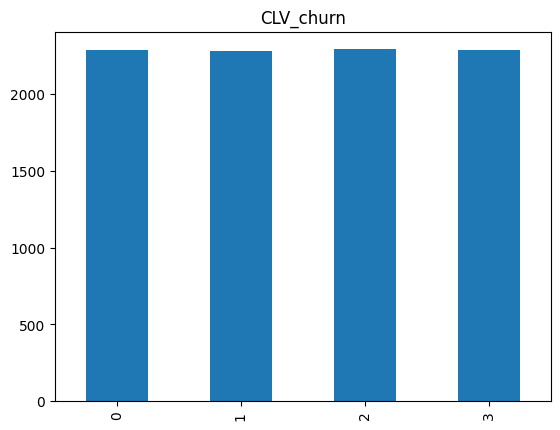

In [ ]:
# Verteilung der ZV anschauen
import matplotlib.pyplot as plt
fig = plt.figure()
df_1['CLV_churn'].value_counts(sort=False).sort_index().plot(kind='bar', title='CLV_churn')

**Hier Quelle suchen** die sagt, dass wenn Datensatz gleich verteilt ist, dass man dann die accuracy anschaut und nicht den f1 Wert --> datensatz ist hier balanciert

Visualisierung der ganzen Datentabelle (UNFERTIG/ANSATZ)

In [ ]:
#Schritt 1: Erstelle eine Liste der kodierten (encoded) und nicht kodierten (non-encoded) Spalten in deinem DataFrame:

encoded_columns = list(dummy_liste.columns)
numerical_columns = list(set(df_1_mitdummys.columns) - set(encoded_columns))


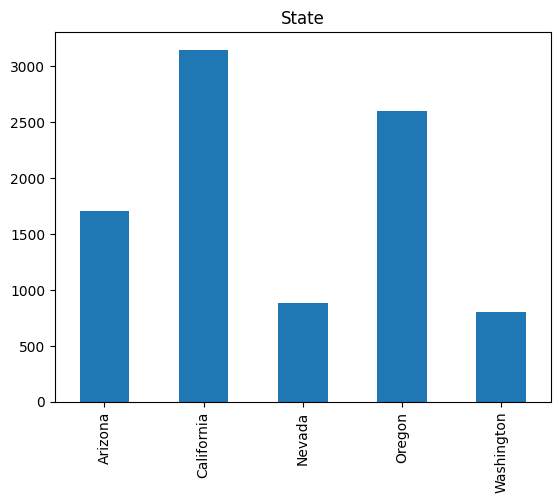

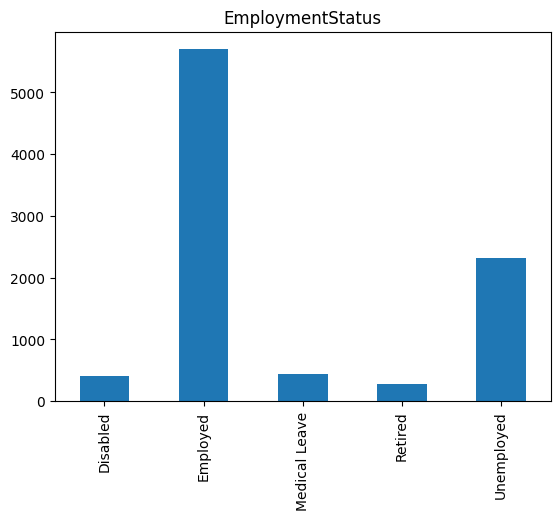

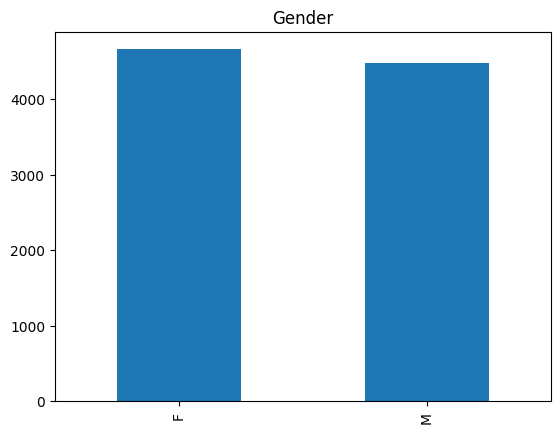

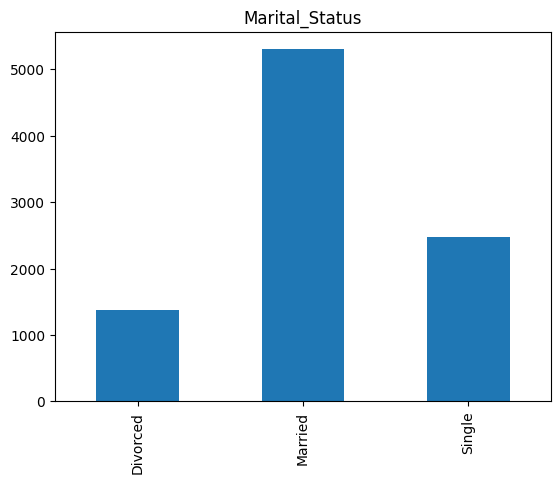

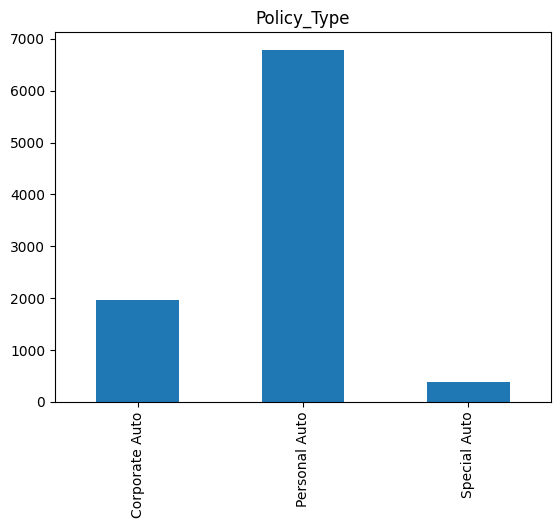

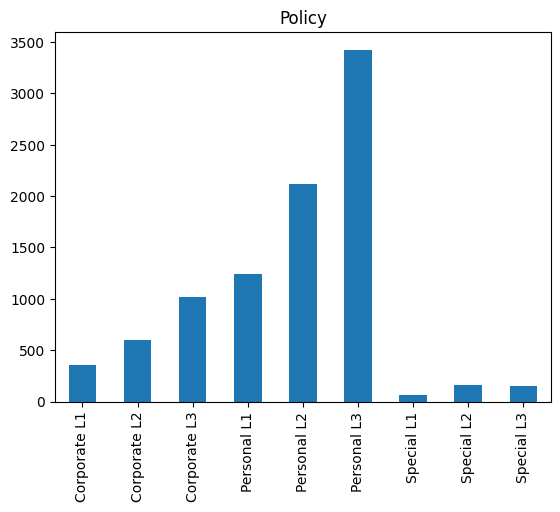

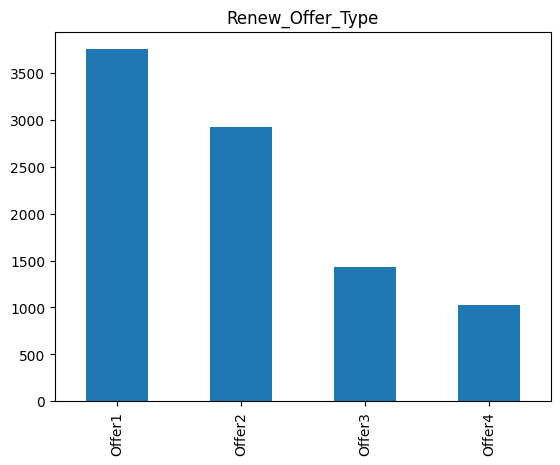

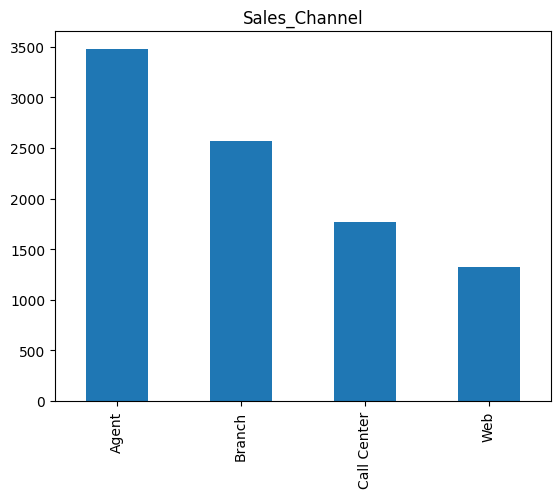

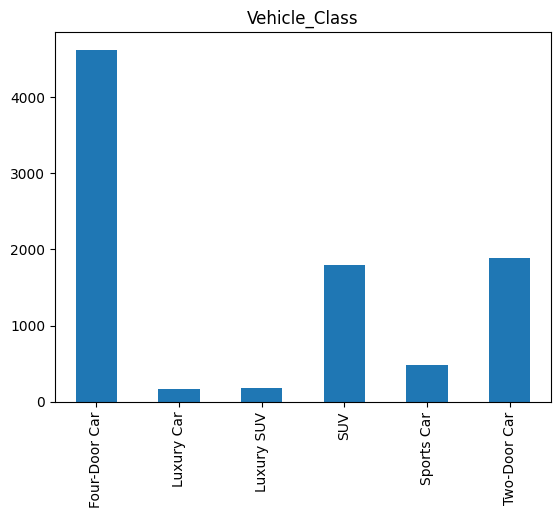

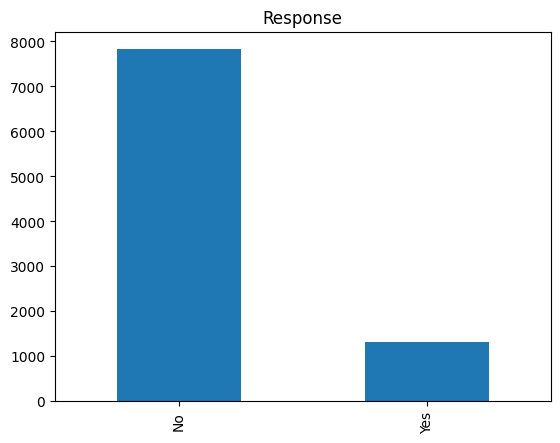

In [ ]:
#Schritt 2: Plotte die Werte jeder kodierten Spalte, indem du die Häufigkeit jedes Werts berechnest, nach dem Index sortierst und dann ein Balkendiagramm erstellst:

import matplotlib.pyplot as plt
for column in encoded_columns:
    fig = plt.figure()
    dummy_liste[column].value_counts(sort=False).sort_index().plot(kind='bar', title=column)

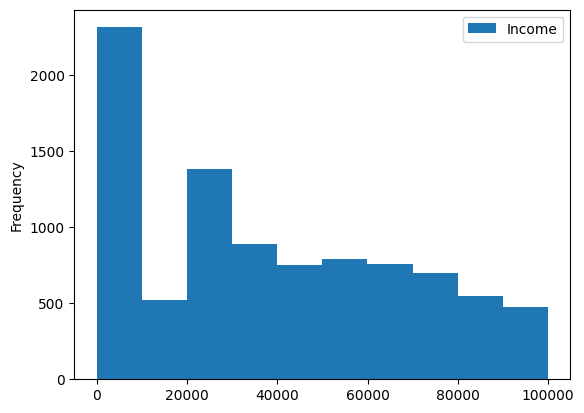

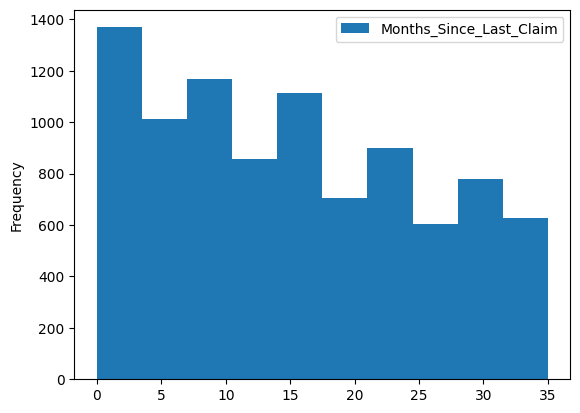

In [ ]:
#Schritt 3: Erstelle Histogrammdiagramme für die nicht kodierten Spalten:

#for column in numerical_columns:
 #   df_1_mitdummys.plot(kind='hist', y=column)

 #Nur mit  Income und Months Since Last Claim, da übersichtlicher. Diese Variablen fehlen oben, alle andere Variablen sind oben visualiiert.

columns_to_plot = ["Income", "Months_Since_Last_Claim"]

for column in columns_to_plot:
    df_1_mitdummys.plot(kind='hist', y=column)

In [ ]:
df_corr =  df_1_mitdummys.corr('spearman').round(1) #Anpassen. Kommt unten bei Cluster vor!

<ipython-input-50-b6d573c88d75>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr =  df_1_mitdummys.corr('spearman').round(1) #Anpassen. Kommt unten bei Cluster vor!


Text(0.5, 1.0, 'Spearman correlation between variables')

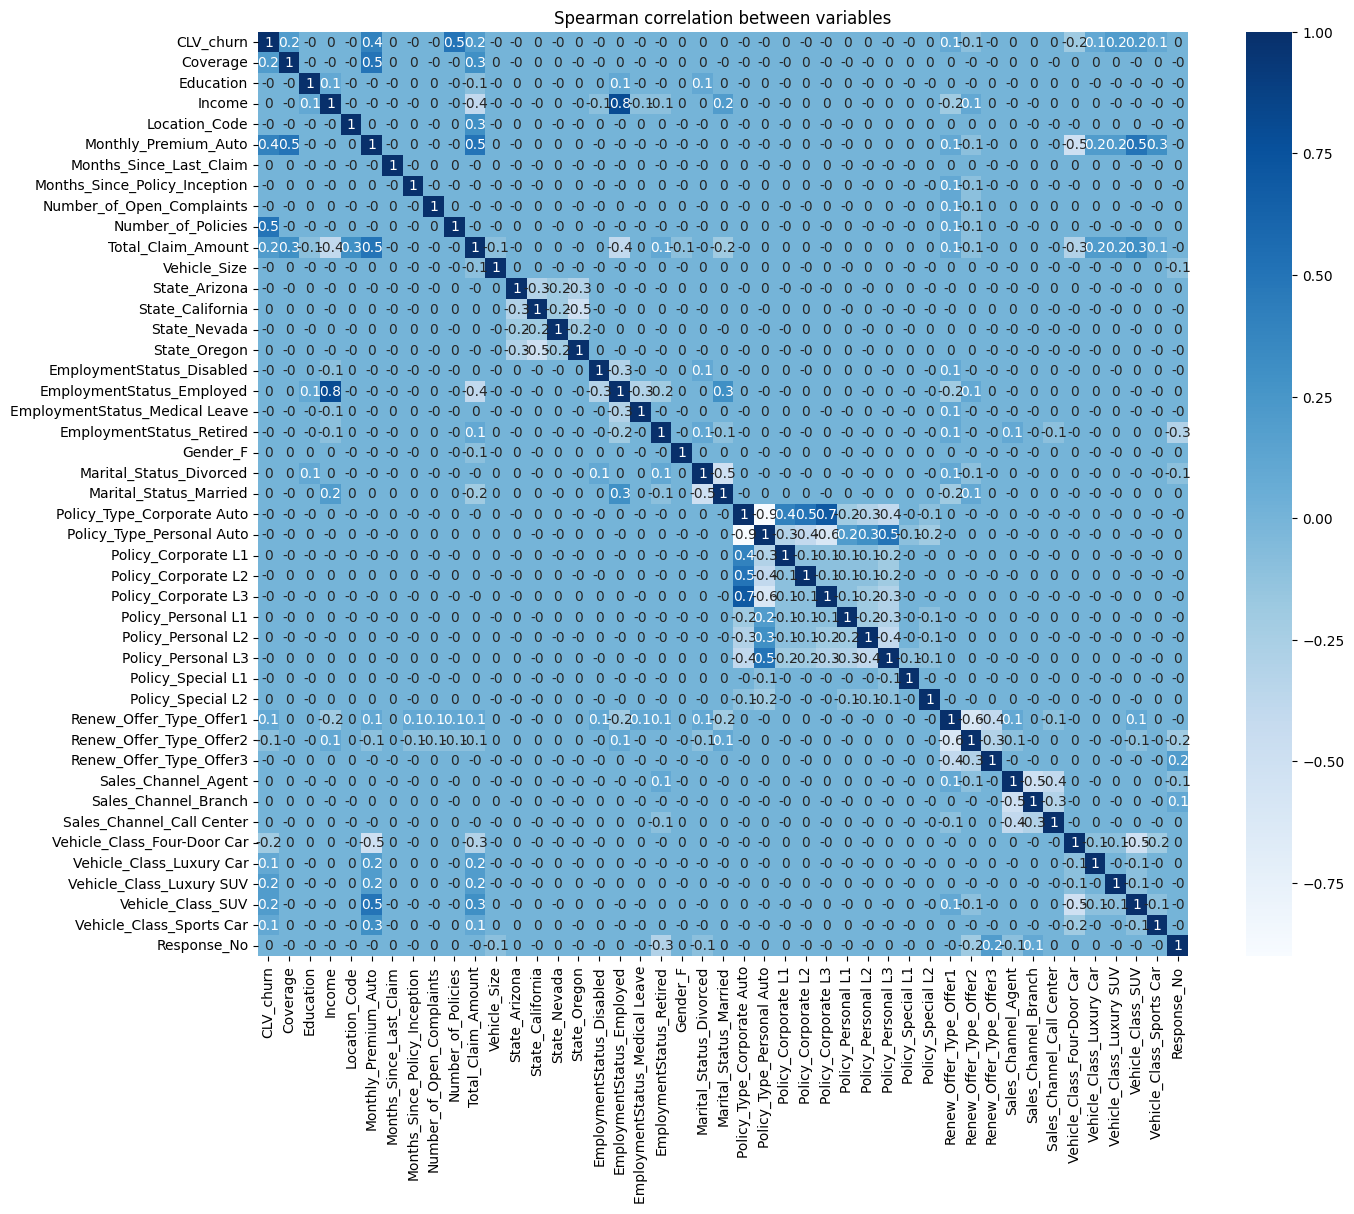

In [ ]:
#Schritt 4: Erstelle eine Korrelations-Heatmap, um die Korrelationen zwischen den Spalten darzustellen:
import seaborn as sns

plt.figure(figsize=(15, 12)) #Anpassen. Kommt unten bei Cluster vor!

ax = sns.heatmap(df_corr, annot=True, cmap='Blues')

plt.title("Spearman correlation between variables")

In [ ]:
#EXTRA - Visualisierung
#Boxplots: Verwende Boxplots, um die Verteilung und mögliche Ausreißer in numerischen Spalten zu visualisieren.
#Erklärung: Gesamteinkommen geht von 0 bis 100.000. Der Median ist bei circa 37.000 Dollar. Das Dritte Quartil ist bei 61.000.
#df_1_mitdummys.boxplot(column='Income')

##**Schritt 2: Classification**

Immer 3 Varianten je Methode ausprobiert - Ergebnis: y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei KNN ansonsten keinen Unterschied

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
def evaluate(clf, X_test, y_true): #clf = classifier; X_test = neue Variable
  y_pred = clf.predict(X_test)
  print(classification_report(y_true, y_pred)) #performance von modell evaluieren

###**KNN**

####**KNN y skaliert - ohne Ergebnis**

In [ ]:
# y skaliert
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#knn.fit(X_train, y_train) Ohne Ergebnis deswegen ausgegraut
# funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**KNN y unskaliert**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Ergebnisse_KNN_y_unskaliert = evaluate(knn, X_test, y_test) # 0.46

              precision    recall  f1-score   support

           0       0.44      0.67      0.53       428
           1       0.49      0.47      0.48       458
           2       0.42      0.35      0.38       454
           3       0.52      0.38      0.44       487

    accuracy                           0.46      1827
   macro avg       0.47      0.47      0.46      1827
weighted avg       0.47      0.46      0.46      1827



####**KNN y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Ergebnisse_KNN_y_unskaliert_X_ohne_Dummies = evaluate(knn, X_test, y_test) # 0.6

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       428
           1       0.63      0.67      0.65       458
           2       0.56      0.48      0.52       454
           3       0.65      0.45      0.53       487

    accuracy                           0.60      1827
   macro avg       0.60      0.60      0.59      1827
weighted avg       0.60      0.60      0.59      1827



####**Hyperparameter Tuning**

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = knn
#grid_vals = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

#grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
 #                      cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.61 statt 0.6

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = knn
grid_vals = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.64 statt 0.6

KeyboardInterrupt: ignored

####**Error Analysis**

In [ ]:
#KNN
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**Logistische Regression**

####**Logistische Regression y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#logistic.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**Logistische Regression y unskaliert**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

In [ ]:
Ergebnisse_log_y_unskaliert = evaluate(logistic, X_test, y_test) # 0.61

####**Logistische Regression y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

In [ ]:
Ergebnisse_log_y_unskaliert_X_ohne_Dummies = evaluate(logistic, X_test, y_test) # 0.61

####**Hyperparameter Tuning**

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
# V1 - Verworfen, da V2 besser performt.
#from sklearn.model_selection import GridSearchCV
#model = logistic
#grid_vals = {
#    'penalty': ['l1', 'l2'],
#    'C': [0.001, 0.01, 0.1, 1, 10],
#}

#grid_lr = GridSearchCV(estimator=logistic, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.62 statt 0.61

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = logistic
grid_vals = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
}
grid_lr = GridSearchCV(estimator=logistic, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.62 statt 0.61

####**Error Analysis**

In [ ]:
#Logistische Regression
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**Decision Tree**

####**Decision Tree y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#tree.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**Decision Tree y unskaliert**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
Ergebnisse_tree_y_unskaliert = evaluate(tree, X_test, y_test) # 0.92

####**Decision Tree y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
Ergebnisse_tree_y_unskaliert_X_ohne_Dummies = evaluate(tree, X_test, y_test) # 0.92

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X_skaliert_ohneDummies.columns);

####**Hyperparameter Tuning**

In [ ]:
# V1 - Verworfen, da schlechter ist als V2 und V3
#from sklearn.model_selection import GridSearchCV
#model = tree
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#}

#grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.92 statt 0.92

In [ ]:
# V2 verworfen, ,da V3 detaillierter ist und mehr Hyperparameter testet, jedoch selbes Ergebnis
#from sklearn.model_selection import GridSearchCV
#model = tree
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5],
#}

#grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = tree
grid_vals = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

####**Error Analysis**

In [ ]:
#Decision Tree
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**Random Forest**

####**Random Forest y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#random_forest.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**Random Forest y unskaliert**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)


In [ ]:
Ergebnisse_forest_y_unskaliert = evaluate(random_forest, X_test, y_test) # 0.93

####**Random Forest y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)

In [ ]:
Ergebnisse_forest_y_unskaliert_X_ohne_Dummies = evaluate(random_forest, X_test, y_test) # 0.93

####**Hyperparameter Tuning**

In [ ]:
# V1 - Gleich wie V2 in PErformance, deswegen V1 verworfen, da V2 komplexer ist in HP Tuning
#from sklearn.model_selection import GridSearchCV
#model = random_forest
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#}

#grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = random_forest
grid_vals = {
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

####**Error Analysis**

In [ ]:
#Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

###**XG Boost**

####**XGBoost y skaliert - ohne Ergebnis**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#xgb.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**XGBoost y unskaliert**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
Ergebnisse_xg_y_unskaliert = evaluate(xgb, X_test, y_test) # 0.93

####**XGBoost y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
Ergebnisse_xg_y_unskaliert_X_ohne_Dummies = evaluate(xgb, X_test, y_test) # 0.93 (0,944 war es am So/Mo)

####**Hyperparameter Tuning**

In [ ]:
# V1 - Verworfen, da V3 am komplexten ist und leicht besser als V1 / V2 --> Notiz: V3 nochmal durchlaufen lassen un endgültige Werte nehmen
#from sklearn.model_selection import GridSearchCV
#model = xgb
#grid_vals = {
#    'verbose': [0],
#    'warm_start': [False]
#}

#grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93 (0,944 war es am So/Mo)

In [ ]:
# V2
#from sklearn.model_selection import GridSearchCV
#model = xgb
#grid_vals = {
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_leaf_nodes': [None],
#}

#grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93 (0,944 war es am So/Mo)

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = xgb
grid_vals = {
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93 (war davor 0.94. Iwie nicht mehr jetzt)

####**Error Analysis**

In [ ]:
#XG Boost (Unsere Alte Rangehensweise- Läuft nicht!)

##from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(
   # grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Reduziere die Anzahl der Parameterkombinationen im Grid --> 0.94 Accuracy kommt hier jetzt raus?
grid_vals = {
    'max_depth': [3, 5],
    'max_features': ['auto', 'sqrt'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 0.1],
}

# Reduziere die Anzahl der Kreuzvalidierungs-Folds
grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy', cv=3,
                       refit=True, return_train_score=True)

# Passen Sie das GridSearchCV-Objekt mit den Trainingsdaten an
grid_lr.fit(X_train, y_train)

# Vorhersagen für den Testdatensatz
y_pred = grid_lr.best_estimator_.predict(X_test)

# Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Klassifikationsbericht
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Visualisierung der Konfusionsmatrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['sehr gefährdet', 'gefährdet', 'nicht gefährdet', 'gar nicht gefährdet'])
disp.plot()

# Weitere Visualisierungen zur Fehleranalyse (optional)
# z.B. ROC-Kurve, Präzisions-Recall-Kurve, Histogramm der Vorhersagen usw.


In [ ]:
# EXTRA Visualisierung - Precision Recall Curve.

#Die Präzisions-Rückruf-Kurve zeigt den Kompromiss zwischen Präzision und Rückruf für verschiedene
#Schwellenwerte. Ein großer Bereich unter der Kurve steht sowohl für eine hohe Trefferquote als auch für eine hohe
#Präzision, wobei eine hohe Präzision mit einer niedrigen Falsch-Positiv-Rate und eine hohe Trefferquote mit einer niedrigen
#Falsch-Negativ-Rate einhergeht. Hohe Werte für beide zeigen, dass der Klassifikator sowohl genaue Ergebnisse liefert (hohe Präzision)
#als auch eine Mehrheit aller positiven Ergebnisse (hoher Recall).
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# One-hot Encoding der Zielvariable
y_test_bin = label_binarize(y_test.values, classes=np.unique(y_test.values))

# Vorhersagen für den Testdatensatz
y_probs = grid_lr.predict_proba(X_test)

# Definiere die Klassen basierend auf den eindeutigen Werten der Zielvariablen
classes = np.unique(y_test.values)

# Präzisions-Recall-Kurve und durchschnittliche Präzision für jede Klasse berechnen
precision = dict()
recall = dict()
avg_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_probs[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_probs[:, i])

# Präzisions-Recall-Kurven plotten
plt.figure()
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label='Precision-Recall Curve ({})'.format(classes[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()




In [ ]:
#EXTRA - Visualisierung ROC Kurve
#FEHLT: Erklärung ROC Kurve... Deckt sich mit dem oben.

# ROC-Kurve und AUC für jede Klasse berechnen
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# ROC-Kurven plotten
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC Curve ({})'.format(classes[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()

### Visualisierung vom besten Modell "XG Boost nach HP Tuning (R^2=0,94) & Error Analysis

In [ ]:
#EXTRA - Aber nicht sicher wie man interpretiert... Unskalierte nehmen # ERROOOORRR Wo unskaliert x?

# Vorhersagen für den Testdatensatz
y_pred = grid_lr.best_estimator_.predict(x_unskaliert_mitdummys)

# Gemeinsamkeiten zwischen den falsch vorhergesagten Kunden
false_predictions = x_unskaliert_mitdummys [y_test != y_pred]
common_features = false_predictions.mean()

# Ausgabe der gemeinsamen Merkmale
print("Gemeinsame Merkmale der falsch vorhergesagten Kunden:")
print(common_features)


In [ ]:
#print("Länge von y_test:", len(y_test))
#print("Länge von x_unskaliert_mitdummys:", len(x_unskaliert_mitdummys))

In [ ]:
#print(x_unskaliert_mitdummys.columns)


In [ ]:
# Auf 1 Nachkommastelle gerundet. Benötigen noch unskalierte X Daten.
false_predictions = X_test[y_test != y_pred].round(1)

# Berechnen Sie die Korrelationsmatrix der Merkmale in Ihrem gefilterten Datensatz.
correlation_matrix = false_predictions.corr().round(1)

# Visualisieren Sie die Korrelationsmatrix als Heatmap, um die Stärke und Richtung der Korrelationen zu visualisieren.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Merkmalskorrelation der falsch vorhergesagten Kunden')
plt.show()


###Ergebnis der Classification

hier ausführlichere Erklärung für was wir uns entschieden haben (X_skaliert_ohneDummies und y unskaliert)

**--> XG Boost V3 erzielt das beste Ergebnis mit 94% nach der Optimierung**
accuracy: wv % wurden richtig vorhergesagt
f1 Wert wenn DS sehr unbalanciert sonst accuracy


In [ ]:
# auf testdatensatz evaluieren

##3. Multiple lineare Regression

**Ziel**:
In diesem Kapitel möchten wir das Unternehmen handlungsfähig machen mit einem vorausschauenden Blick auf die Vorhersage des Customer Lifetime Values für die Kunden in der Zukunft.
Hierzu verwenden wir die multiple lineare Regression.

Wir vergleichen insgesamt 4 Methoden (inklusive Dummy Regressor) basierend auf der erzielten Vorhersagewahrscheinlichkeit: Lineare Regression (Ordinary Least Squares & Ridge Regression), Decision Tree und Gradient Boosting.

Dabei haben wir immer 2 Varianten je Methode getestet:

- y skaliert, x unskaliert
- y skaliert, x skaliert

Der besseren Variante wird pro Methode ein Hyperparameter-Tuning unterzogen.
Die Methode mit dem besten R^2 Wert (und Bias sowie Variance) unterziehen wir eine Error Analyse und einer Visualierung.

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
    pred = reg.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, pred)

    # Berechnung des Bias
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    bias = mae_train - mae_test

    # Berechnung der Varianz
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    variance = mse_test - mae_test**2

    print('R2:', r2)
    print('MAE:', round(mae, 3))
    print('MSE:', round(mse, 3))
    print('RMSE:', round(rmse, 3))
    print('MAPE:', round(mape, 3))
    print('Bias:', round(bias, 3))
    print('Varianz:', round(variance, 3))

In [ ]:
# Dummy Regressor -> Dient zum Performance-/Modellvergleich
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
evaluate(dummy, X_test, y_test)

R2: -0.00015451008198086313
MAE: 4567.872
MSE: 51544108.326
RMSE: 7179.423
MAPE: 0.795
Bias: -160.586
Varianz: 30678652.233


| Metrik | Beschreibung |
|--------|-------------|
| R2 | R-Quadrat, auch bekannt als Bestimmtheitskoeffizient, misst den Anteil der Varianz in der abhängigen Variable, der durch die unabhängigen Variablen vorhersagbar ist. Es ist ein Wert zwischen 0 und 1, wobei 1 eine perfekte Anpassung angibt. |
| MAE | Mean Absolute Error misst den durchschnittlichen absoluten Unterschied zwischen den vorhergesagten und tatsächlichen Werten. Es gibt eine Vorstellung davon, wie weit die Vorhersagen von den tatsächlichen Werten entfernt sind. |
| MSE | Mean Squared Error misst den Durchschnitt der quadrierten Unterschiede zwischen den vorhergesagten und tatsächlichen Werten. Es ist nützlich, um große Fehler zu bestrafen, weshalb es eine gute Metrik für Modelle mit Ausreißern ist. |
| RMSE | Root Mean Squared Error ist die Quadratwurzel des MSE. Es misst die durchschnittliche Größe der Fehler in denselben Einheiten wie die ursprüngliche Variable.|
| MAPE | Mean Absolute Percentage Error misst die durchschnittliche prozentuale Differenz zwischen den vorhergesagten und tatsächlichen Werten. Es ist eine gute Metrik zur Bewertung der Leistung von Modellen mit unterschiedlichen Datenskalen. |

**Ergebnis**: Der R2-Wert des Dummy Regressors ist mit -0,00015 sehr schlecht. Das skalierte und unskalierte X kommen zum gleichen Ergebnis. Das Modell hat bisher keine Vorhersagekraft und kann die abhängigen Variablen nicht durch die unabhängige Zielvariable vorhersagen.







| Weitere Metriken |
|--------|
| **Bias** |
Der Bias eines Modells gibt an, wie stark die Vorhersagen im Durchschnitt von den tatsächlichen Werten abweichen.
*Hoher Bias:* Das Modell ist zu stark vereinfacht und erfasst nicht alle relevanten Muster und Zusammenhänge in den Daten.
*Niedriger Bias*: Das Modell passt gut zu den Daten und erfasst die zugrunde liegenden Beziehungen angemessen. |
| **Varianz** |
 Die Varianz eines Modells gibt an, wie stark die Vorhersagen von einem Trainingsdatensatz zu einem anderen variieren.
 *Hohe Varianz:* Das Modell ist überanpassungsfähig (Overfitting) und passt sich zu stark den spezifischen Trainingsdaten an. Es kann schlecht auf neue Daten generalisieren.
*Niedrige Varianz:* Das Modell ist stabil und liefert konsistente Vorhersagen, unabhängig vom Trainingsdatensatz.|

**Ergebnis**: Der Bias beträgt -160.59, weswegen das Modell dazu neigt, den Customer Lifetime Value der Kunden zu unterschätzen.
Die Varianz beträgt 30678652,233, weswegen die Vorhersagen des Modells sehr stark streuen und es relativ viele unterschiedlichen Vorhersagen gibt. Dies könnte auf eine hohe Komplexität und Overfitting des Modells hindeuten.

###**Lineare Regression**

Die erste zu testende Methode ist die lineare Regression.
Hier testen wir:


**Ordinary Least Squares (OLS):**


OLS minimiert die Summe der quadrierten Abweichungen zwischen beobachteten und vorhersagten Werten für die Schätzung der Regressionskoeffizienten.

**Ridge Regression:**

OLS wird durch die Ridge Regression als Regularisierungstechnik erweitert. Diese Methode dient zur Modellstabilitätsverbesserung indem die Multikollinearität umgeht wird für die Koeffizientenschätzung.


####**Ordinary Least Squares**

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
linear_scaled = make_pipeline(scaler, linear)
linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Berechnung des Bias
pred_train = linear_scaled.predict(X_train)
pred_test = linear_scaled.predict(X_test)
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
bias = mae_train - mae_test

# Berechnung der Varianz
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
variance = mse_test - mae_test**2

evaluate(linear_scaled, X_test, y_test)
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))


R^2: 0.159
MAE: 3975.606
MSE: 43351116.759
RMSE: 6584.156
MAPE: 0.613
Bias: -132.023
Varianz: 27545673.409


**Ergebnis R^2**: Im Falle der Ordinary Least Squares hat das skalierte X besser performt (R^2 = 0,159) als das unskalierte X (R^2 = 0,152).
Allgemein ist die Regression jedoch noch relativ schlecht in der Vorhersage und erklärt nur 15,9% der Varianz in den beobachteten CLV-Daten.

Dennoch performt unsere lineare Regression deutlich besser als der Dummy Regressor, welchen wir vorher getestet haben. Wir sind von einem R^2 von - 0,00015 auf 0,159 gestiegen insgesamt.


**Ergebnis Bias & Varianz**: Der Bias beträgt -132.023, weswegen das Modell dazu neigt, den Customer Lifetime Value der Kunden zu unterschätzen. Die Varianz beträgt 27545673.409, weswegen die Vorhersagen des Modells sehr stark streuen und relativ viele unterschiedliche Vorhersagen gibt. Dies könnte auf eine hohe Komplexität und Overfitting des Modells deuten.

Dennoch performt OLS auch in diesen Werten besser als der Dummy Regressor.

#####**Hyperparameter Tuning**

Um die bestmöglichste Leistung aus einem Modell zu erzielen und Over-/Underfitting zu vermeiden, setzt man Hyperparameter Tuning durch.

Jedoch macht dies nur bedingt Sinn bei OLS, da es keine anzupassbaren Hyperparameter gibt.

Aus diesem Grund führen wir hier kein Tuning durch.

####**Ridge Regression**

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(scaler, RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e-10,
       5.29197874e-10, 5.87278661...
       9.11588830e-03, 1.01163798e-02, 1.12266777e-02, 1.24588336e-02,
       1.38262217e-02, 1.53436841e-02, 1.70276917e-02, 1.88965234e-02,
       2.09704640e-02, 2.32720248e-02, 2.58261876e-02, 2.86606762e-02,
       3.18062569e-02, 3.52970730e-02, 3.91710149e-02, 4.34701316e-02,
       4.82410870e-02, 5.35356668e-02, 5.94113398e-02, 6.59318827e-02,
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))])

In [ ]:
def evaluate(reg, X_test, y_test):
    pred = reg.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, pred)

    # Berechnung des Bias
    pred_train = reg.predict(X_train)
    pred_test = pred
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_test = mae
    bias = mae_train - mae_test

    # Berechnung der Varianz
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mse
    variance = mse_test - mae_test**2

    print('R2:    ', round(r2, 3))
    print('MAE:   ', round(mae, 3))
    print('MSE:   ', round(mse, 3))
    print('RMSE:  ', round(rmse, 3))
    print('MAPE:  ', round(mape, 3))
    print('Bias:  ', round(bias, 3))
    print('Varianz:', round(variance, 3))

evaluate(linear_ridge, X_test, y_test)

R2:     0.159
MAE:    3975.593
MSE:    43351302.552
RMSE:   6584.171
MAPE:   0.613
Bias:   -132.044
Varianz: 27545964.243


**Ergebnis R^2**: Im Falle der Ridge Regression hat das skalierte X erneut besser performt (R^2 = 0,159) als das unskalierte X (R^2 = 0,152).
Allgemein ist die Regression jedoch noch relativ schlecht in der Vorhersage des CLV.

OLS und Ridge Regression performen nahezu identisch.

**Ergebnis Bias & Varianz**: Der Bias beträgt -132.044, weswegen das Modell dazu neigt, den Customer Lifetime Value der Kunden zu unterschätzen. Die Varianz beträgt 27545964.243, weswegen die Vorhersagen des Modells sehr stark streuen und relativ viele unterschiedliche Vorhersagen gibt. Dies könnte auf eine hohe Komplexität und Overfitting des Modells deuten.

Diese Werte unterscheiden nur sehr marginal im Vergleich zur OLS-Methode.

#####**Hyperparameter Tuning**

Wir möchten nun das Ergebnis (R^2) der Ridge Regression verbessern.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [ ]:
ridge = Ridge()

In [ ]:
random_search = RandomizedSearchCV(ridge, param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                  100.0],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']})

In [ ]:
best_params = random_search.best_params_

In [ ]:
ridge_best = Ridge(alpha=best_params['alpha'], solver=best_params['solver'])
ridge_best.fit(X_train, y_train)

Ridge(alpha=100.0)

In [ ]:
pred_train = ridge_best.predict(X_train)
pred_test = ridge_best.predict(X_test)


In [ ]:
# Berechnung der Metriken
r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = mean_squared_error(y_test, pred_test, squared=False)
mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
bias = mae_train - mae_test

# Berechnung der Varianz
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
variance = mse_test - mae_test**2

# Ausgabe der Metriken, Bias und Varianz
print('R^2:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.16
MAE: 3973.755
MSE: 43304297.256
RMSE: 6580.6
MAPE: 0.614
Bias: -128.625
Varianz: 27513571.011


**Ergebnis R^2**: Nach dem Hyperparameter-Tuning ist der R^2-Wert von 0,159 auf 0,160 verbessert worden.

**Ergebnis Bias & Varianz:**
Ebenfalls hat sich der Bias von -132,044 auf -128,617 und die Varianz von 27545964.243 auf 27545964,243 marginal verbessert. Dies deutet auf etwas weniger Unterschätzung und etwas weniger Streuuung in der Vorhersage des CLV hin.

###**Decision Tree**

Der Decision Tree (Entscheidungsbaum) stellt Entscheidungsregeln in Form eines baumaartigen Diagramms dar. Entscheidungen werden hier entlang der inneren Knoten und deren Merkmalen des Baumes in immer kleinerwerdenden Untermengen getroffen.

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
bias = mae_train - mae_test

# Berechnung der Varianz
mse_test = mean_squared_error(y_test, pred_test)
variance = mse_test - mae_test**2

In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.491
MSE: 26217444.718
MAE: 1671.954
MAPE: 11.732
Bias: -1671.954
Varianz: 23422014.221


**Ergebnis R^2**: Im Falle des Decision Trees hat das skalierte X erneut besser performt (R^2 = 0,491) als das unskalierte X (R^2 = 0,450). Allgemein ist das Modell jedoch noch nicht sehr gut in der Vorhersage des CLV.

Jedoch performt der Decision Tree mit 0,491 bereits vor dem Hyperparameter-Tuning deutlich besser als die Ridge Regression mit 0,160 bezüglich R^2.

**Ergebnis Bias & Varianz:** Im Falle des Bias hat sich dieses Modell verschlechtert von -128,617 bei der Ridge Regression auf -1671,954. Die Varianz hat sich jedoch verbessert mit einem aktuellen Wert von 23422014.221.

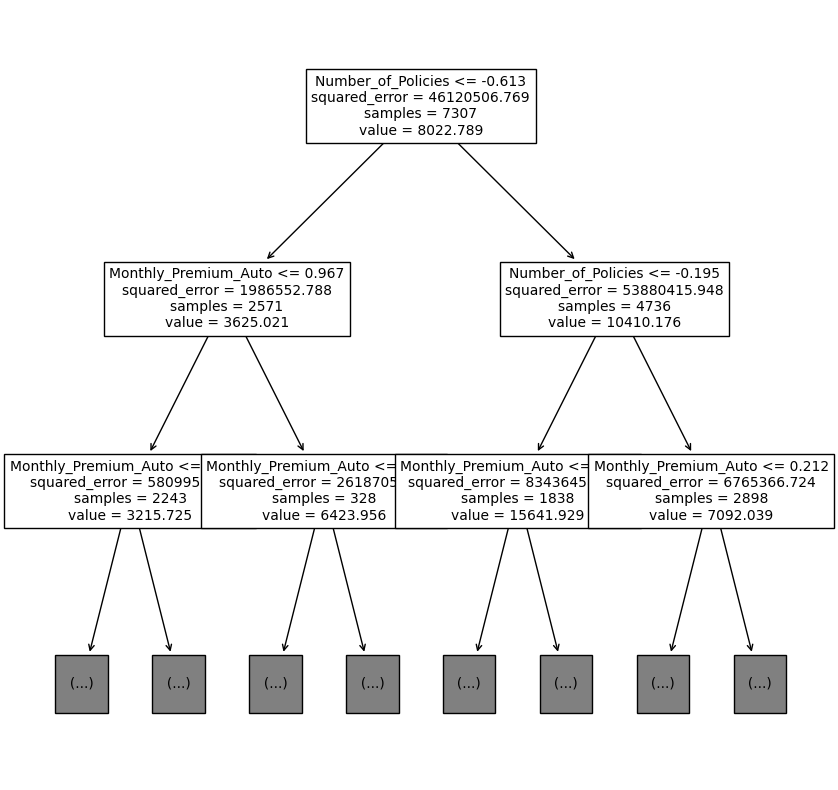

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X.columns);

**Interpretation**: Wir können anhand der Decision-Tree-Visualisierung erkennen, dass die Anzahl der Verträge den größten Einfluss auf den Customer Lifetime Value hat.
Wenn der Wert kleiner gleich -0.613 ist, spielt Monthly_Premium_Auto eine große Rolle in der Vorhersage des Customer Lifetime Values.

In [ ]:
df['Number_of_Policies'].unique()

In [ ]:
predictions = tree.predict(X_test)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
df_with_predictions = df_with_predictions.sort_values(by='Number_of_Policies')

Schauen ob eine Andere Darstellung gibt, da wir hier Fehler bekommen!

In [ ]:
import matplotlib.pyplot as plt

ax = df_with_predictions.plot(x='Number_of_Policies', y='Customer_Lifetime_Value', kind='scatter', s=20, edgecolor='black',
                              c='darkorange', label='data', figsize=(20, 5))

df_with_predictions.plot(x='Number_of_Policies', y='Prediction', kind='line', color='cornflowerblue',
                          label='prediction', linewidth=2, ax=ax)

ax.set_xlabel('Number_of_Policies')
ax.set_ylabel('Customer_Lifetime_Value')
ax.set_title('Decision Tree Regression')
ax.legend()

plt.show()


Hier kann man in der blauen Linie die Vorhersage des Decision Trees erkennen. Jedoch besteht hier noch overfitting, weswegen nach besseren Modellen und Verbesserungen dieser weitergestrebt wird.

#####**Hyperparameter Tuning**

Wir möchten nun das Ergebnis (R^2) des Decision Trees verbessern.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid = {'ccp_alpha': [0.1, 0.2, 0.3],
        'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
        'max_depth': [None, 10, 20]}

In [ ]:
optimized_tree = RandomizedSearchCV(tree, grid, n_iter=100, n_jobs=-1, random_state=42, verbose=3)
optimized_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.1, 0.2, 0.3],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20]},
                   random_state=42, verbose=3)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

pred_train = optimized_tree.predict(X_train)
pred_test = optimized_tree.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
bias = mae_train - mae_test

# Berechnung der Varianz
variance = mse_test - mae_test**2


In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))


R^2: 0.617
MSE: 19732139.691
MAE: 1665.175
MAPE: 12.852
Bias: -1671.954
Varianz: 23422014.221


Ergebnis: Das Hyperparameter-Tuning erreicht eine Verbesserung der R^2 Metrik von 0,491 auf 0,617, was für eine sehr gute Anpassung der Hyperparameter spricht.

Nach dem Tuning performt der Decision Tree signifikant besser als die Ridge Regression (Von 0,16 auf 0,617 verbessert).

Der CLV kann nun um 61,7% durch die abhängige Variable (Kundenmerkmale) erklärt werden.



Im Falle des Bias hat sich dieses Modell nach dem Tuning nicht verändert.

###**Gradient Boosting**

Das Gradient Boosting bbasiert auf Entscheidungsbäumen. Es werden viele kleine, schwache Lerner, also hier Entscheidungsbäume, geschätzt, welche gemittelt das finale Modell ergeben.

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
xgb = GradientBoostingRegressor(random_state=42)
xgb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
xgb = GradientBoostingRegressor(random_state=42)
xgb.fit(X_train, y_train)

pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
bias = mae_train - mae_test

# Berechnung der Varianz
variance = mse_test - mae_test**2

In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.674
MSE: 16792274.919
MAE: 1729.768
MAPE: 13.735
Bias: -1671.954
Varianz: 23422014.221


Ergebnis: Im Falle des Gradient Boostings hat das skalierte X erneut besser performt (R^2 = 0,674) als das unskalierte X (R^2 = 0,670).

Der CLV Value kann als unabhängige Variable nun um 67% durch die abhängigen Variablen, also den Kundenmerkmalen, geschätzt werden.

Das Gradient Boosting ist bereits vor dem Hyperparameter Tuning das beste Modell in der vorliegenden Analyse.

Bias und Varianz haben sich nicht geändert.

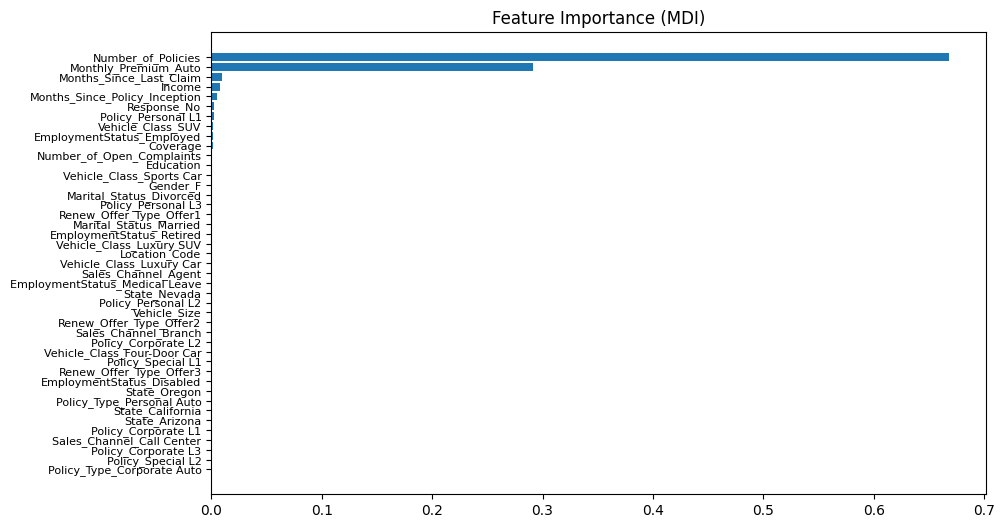

In [ ]:
feature_importance = xgb.feature_importances_

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10, 6))  # Vergrößern der Abbildung
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx], fontsize=8)  # Kleinerer Text für die Beschriftungen
plt.title('Feature Importance (MDI)')
plt.show()


**Interpretation**: Die Visualisierungergebnisse der Feature Importance decken sich mit den Ergebnissen der Decision Tree Visualisierung.

Aus der Grafik können wir erkennen, dass die Variablen Number_of_Policies und Monthly_Premium_Auto mit Abstand den stärksten Einfluss auf die Vorhersage des Customer Lifetime Values haben.

Weitere relevante Features sind:
- Months_Since_Last_Claim
- Income
- Months_Since_Policy_Inception
- Response_No
- Policy_Personal L1
- Vehicle_Class_SUV
- EmploymentStatus_Employed
- Coverage  



#####**Hyperparameter Tuning**

Wir möchten nun das Ergebnis (R^2) des Gradient Boostings verbessern.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
grid = {
    'min_samples_split': sp_randint(2, 100),
    'min_samples_leaf': sp_randint(1, 100),
    'max_depth': sp_randint(3, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}


In [ ]:
optimized_xgb = RandomizedSearchCV(xgb, grid, n_iter=10, n_jobs=-1, random_state=42, verbose=3)


In [ ]:
optimized_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f70c6e5b3a0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f70c6cb8160>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f70c6e58ca0>},
                   random_state=42, verbose=3)

In [ ]:
best_params = optimized_xgb.best_params_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


pred_train = optimized_xgb.predict(X_train)
pred_test = optimized_xgb.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape = mean_absolute_percentage_error(y_test, pred_test) * 100

# Berechnung des Bias
bias = np.mean(pred_train) - np.mean(y_test)

# Berechnung der Varianz
variance = np.var(pred_test)

In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.689
MSE: 16047173.851
MAE: 1688.65
MAPE: 13.415
Bias: 89.235
Varianz: 31079632.066


**Ergebnis**: Das Gradient Boosting hat einen guten R^2-Wert von 0,689 erzielt, während es 0,617 bei dem Decision Tree war.

Wir haben in der Ausführung der Methoden beobachten können, dass die Gradient Boosting-Methode den besten R^2-Wert im Vergleich zu den anderen Modellen erzielt hat.

Der CLV kann nun um 68,9% durch die abhängige Variable (Kundenmerkmale) erklärt werden.

Während die Varianz immer noch sehr hoch ist mit 31079632.066, hat sich der Bias jedoch deutlich verbessert von -128,617 vor dem Tuning auf 89,235 nach dem Tuning. Also wird das vorhergesagte CLV im Durchschnitt um 89 Einheiten von den tatsächlichen CLV-Werten abweichen.






#####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Regressionmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.

Aus dem Vergleich der 4 Methoden geht hervor, dass das Gradient Boosting den besten Wert erzielt hat. Aus dem Grund möchten wir hier nun die Error Analyse durchführen.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

best_xgb = optimized_xgb.best_estimator_

predictions = best_xgb.staged_predict(X_test)

n_estimators = len(best_xgb.estimators_)

test_score = np.zeros((n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(predictions):
    test_score[i] = best_xgb.loss_(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


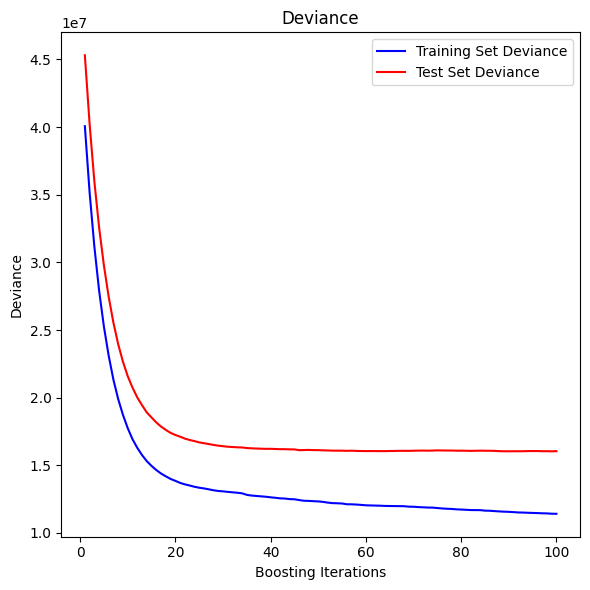

In [ ]:
# Erstellung der Deviance Grafik
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, best_xgb.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

predictions = best_xgb.predict(X_test)

df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

df_with_predictions['pred_diff'] = np.abs(df_with_predictions['Customer_Lifetime_Value'] - df_with_predictions['Prediction'])

# Erstellung Histrogramm mit Vorhersageunterschiede
#Der Code erzeugt ein Histogramm der Vorhersageunterschiede (pred_diff) zwischen den tatsächlichen Werten (Customer_Lifetime_Value)
df_with_predictions['pred_diff'].plot(kind='hist')

**Interpretation**: Wie in der Grafik zu erkennen, unterscheidet sich die Trainingdatensatzlinie nicht stark von der Testdatensatzlinie. Die Testdatensatzlinie liegt über der Trainingsdatensatzlinie, was für eine gute Verarbeitungsfähigkeit von unbekannten Daten und eher gegen Overfitting hindeutet.

Das Training sollte ungefähr nach ca. 20 Iterationen gestoppt werden, da sich das Modell mit mehr Iterationen kaum ändert.

### Sigfnifikanz-Test

## Visualisierung der besten Methode


Als bestes Modell betrachten wir das Gradient Boosting Modell nun genauer mithilfe einer Visualisierung.

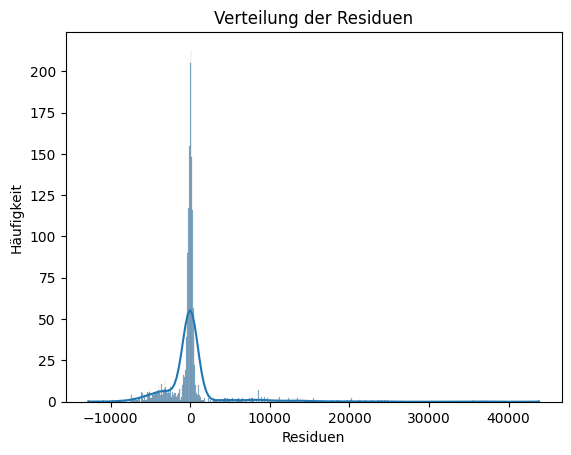

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = optimized_xgb.best_estimator_.predict(X_test)

residuals = y_test - y_pred

# Streudiagramm
plt.scatter(y_test, y_pred)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Vorhersage vs. Tatsächliche Werte')
plt.show()

#Residuenplot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuen')
plt.title('Residuenplot')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontale Linie bei Residuen = 0
plt.show()

# Verteilungsplot der Residuen
sns.histplot(residuals, kde=True)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Residuen')
plt.show()




**Interpretation**: Die Verteilung der Residuen gibt Aufschluss über die Genauigkeit und Gültigkeit des Modells. Da wir im folgenden Verteilungsplot eine symmetrische Verteilung um 0 haben, spricht dies für eine gute Erklärbarkeit des Modells und gegen systematische Fehler.

## Ergebnis der Multiplen linearen Regression

Die nachfolgende Tabelle fasst die R^2-Werte der besten Versuche der 4 getesteten Modelle (inklusive der Dummy Regressor als Referenzpunkt-Modell) jeweils vor und nach dem Hyperparameter-Tuning zusammen. Falls das skalierte X besser als das unskalierte X performt hat, wurde für das unskalierte X kein HP-Tuning durchgeführt.

Obwohl der Decision Tree eine starke Verbesserung im R^2-Wert von 0,491 auf 0,617 erzielt hat, performt das **Gradient Boosting** mit dem skalierten X mit Abstand am Besten mit **0,681**.

Allgemein kann beobachtet werden, dass die Methodenauswahl vom Dummy Regressor bis zum Gradient Boosting die Performance erheblich verbessert hat und der CLV durch unser Modell nun gut schätzbar ist.

In [ ]:
from tabulate import tabulate

data = [
    ['Methode (y=unskaliert)', 'X=Skaliert', 'X=Skaliert nach HP-Tuning', 'X=Unskaliert'],
    ['Dummy Regressor', '-0,00015', 'Kein HP-Tuning', '-0,00015'],
    ['Ordinary Least Squares', '0,159', 'Kein HP-Tuning durchführbar', '0,152'],
    ['Ridge Regression', '0,159', '0,16', '0,152'],
    ['Decision Tree', '0,491', '0,617', '0,45'],
    ['Gradient Boosting', '0,674', '0,681', '0,67']
]

table = tabulate(data, headers='firstrow', tablefmt='github')

table = table.replace('0,681', '\033[91m0,681\033[0m')

print(table)


| Methode (y=unskaliert)   | X=Skaliert   | X=Skaliert nach HP-Tuning   | X=Unskaliert   |
|--------------------------|--------------|-----------------------------|----------------|
| Dummy Regressor          | -0,00015     | Kein HP-Tuning              | -0,00015       |
| Ordinary Least Squares   | 0,159        | Kein HP-Tuning durchführbar | 0,152          |
| Ridge Regression         | 0,159        | 0,16                        | 0,152          |
| Decision Tree            | 0,491        | 0,617                       | 0,45           |
| Gradient Boosting        | 0,674        | 0,681                       | 0,67           |
